# Workshop 8 : Image processing with Numpy

ในภาษา Python มี library สำหรับจัดการรูปภาพมากมายเช่น [OpenCV](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html), [SciKit-Image](http://scikit-image.org/) และ [Pillow](http://python-pillow.org/) เป็นต้น ซึ่งจะช่วยให้เราจัดการกับรูปภาพในงานยากๆได้เป็นอย่างดี 

อย่างไรก็ตาม เป้าหมายของเวิร์กชอปนี้ต้องการให้นิสิตเข้าใจพื้นฐานเทคนิคในการทำ image processing ด้วยเหตุนี้เราจึงเลือกใช้ numpy ในการจัดการกับรูปภาพเพราะเป็นเรื่องนิสิตได้ศึกษามาแล้วในชั้นเรียน และใช้ matplotlib ในการนำเข้าและแสดงผลรูปภาพ

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# Download File

!wget "https://github.com/5730279821-TA/Workshop4_Resource/raw/master/Ws4_resource.zip"

--2022-10-29 17:48:32--  https://github.com/5730279821-TA/Workshop4_Resource/raw/master/Ws4_resource.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/5730279821-TA/Workshop4_Resource/master/Ws4_resource.zip [following]
--2022-10-29 17:48:33--  https://raw.githubusercontent.com/5730279821-TA/Workshop4_Resource/master/Ws4_resource.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6160172 (5.9M) [application/zip]
Saving to: ‘Ws4_resource.zip’

Ws4_resource.zip    100%[===================>]   5.87M  --.-KB/s    in 0.08s   

2022-10-29 17:48:33 (75.4 MB/s) - ‘Ws4_resource.zip’ saved [6160172/616

In [ ]:
# Extract File

import zipfile
with zipfile.ZipFile("Ws4_resource.zip","r") as zip_ref:
    zip_ref.extractall("")

## Read and Crop

โหลดรูปภาพ "elon_musk.jpg" 

In [ ]:
im = plt.imread("elon_musk.jpg")
im.shape


(900, 599, 3)

จะเห็นได้ว่าภาพได้ถูกโหลดเข้ามาใน array ที่มี dimension เป็น 451 x 300 x 3

ซึ่ง 2 ค่าแรก (451 และ 300) แสดงถึง pixel ในแกน Y (ความสูง) และ X(ความกว้าง) ตามลำดับ และค่าสุดท้าย (3) แสดงถึงค่าสี RGB ในภาพนั้น 

ต่อมาเราจะมาดูว่าหน้าตาของภาพนั้นเป็นอย่างไร

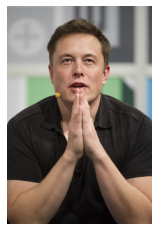

In [ ]:
plt.figure(num=None, figsize=(5, 4))
plt.imshow(im)
plt.axis('off')
plt.show()

ภาพข้างต้นเป็นรูปของ Elon Musk ซีอีโอของบริษัท SpaceX 

ถ้าหากว่าเราต้องการแค่บางส่วนของภาพของอย่างเช่นต้องการแค่ "ใบหน้าของ Elon Musk" 

เราสามารถ crop ภาพที่ต้องการได้ โดยใช้ numpy ในการตัดภาพบางส่วนในอาเรย์ของภาพ

<img src="https://www.picz.in.th/images/2018/10/07/hZL4of.png"  width="200">

Tip : หากต้องการเอาตารางออกจากภาพสามารถแทรกคำสั่ง plt.axis("off") ก่อน plt.show() จะทำให้ตารางหายไป

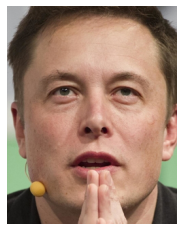

In [ ]:
### TO DO 1 : Crop เอาเฉพาะหน้าของ Elon Musk เก็บไว้ในตัวแปร im2
### แก้ไข [ซ้าย:ขวา,บน:ล่าง,:] ดูสิ

### CODE HERE ###########################

im2 = im[100:420,165:415,:]

#########################################

plt.figure(num=None, figsize=(5, 4))
plt.imshow(im2)
plt.axis('off')
plt.show()

## Colours

แต่ละ pixel ของภาพจะถูกแสดงด้วยตัวเลขจำนวนเต็ม 3 ตัว ซึ่งก็คือค่าของ RGB ที่ผสมกันจนเกิดเป็นสีนั้นๆของภาพขึ้นมา 

ต่อมาเราจะแยกองค์ประกอบของสีโดยการดึง slice ของสีนั้นๆในอาเรย์ของภาพ

<img src="https://www.picz.in.th/images/2018/10/07/hZHmxJ.png"  width="800">

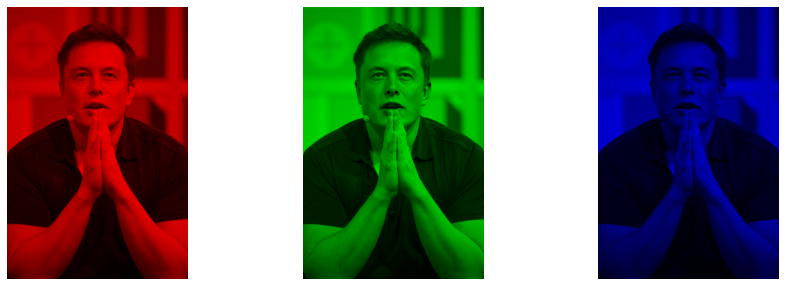

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

## TO DO 2 : จงแยก Channel สีแบ่งเป็น RGB ตามลำดับ (ตามภาพตัวอย่างด้านบน)

# c คือ index และ ax คือ AxesSubplot
for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    
    ### CODE HERE ###########################
    
    tmp_im[:,:,c] = im[:,:,c]

    
    #########################################
    
    ax.axis('off')
    ax.imshow(tmp_im)

## To Greyscale

อีกหัวข้อสำคัญสำหรับเรื่องสีนั่นคือการแปลงภาพ RGB ให้เป็น Greyscale ซึ่งสามารถทำได้หลากหลายวิธีแต่วิธีที่ตรงไปตรงมาที่สุด 

คือการเฉลี่ยค่าสี RGB ของภาพโดยการคูณด้วย weight  ค่าคงที่ BT.601 standard ที่ใช้ในการคำนวนค่าความสว่างของสัญญาณ RGB 

[0.2989, 0.5870, 0.1140] เมื่อนำค่าเหล่านี้ไปคูณในแต่ละ pixel ของสีจะได้ภาพ Greyscale ออกมา 

<img src="https://www.img.in.th/images/f8df6dd73213808cab4ab4b9d58f38f4.png"  width="300">

In [ ]:
### TO DO 3-1 : แก้ไขฟังก์ชันให้สามารถแปลงภาพ RGB ให้เป็น Greyscale โดยวิธีการเฉลี่ยค่าสี (ค่าสีบวกกันหาร 3)

def to_grayscale_avg(im):
  
    ### CODE HERE ###########################
    
    grey_value = (im[:,:,0] + im[:,:,1] + im[:,:,2]) / 3
    
    #########################################
    return grey_value

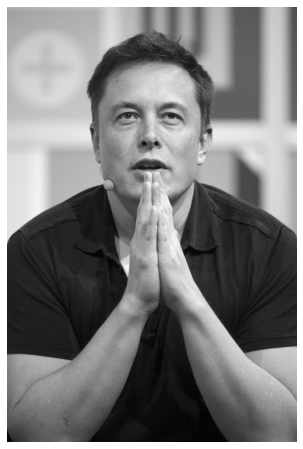

In [ ]:
img_avg = to_grayscale_avg(im/255.0)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_avg, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [ ]:
### TO DO 3-2 : แก้ไขฟังก์ชันให้สามารถแปลงภาพ RGB ให้เป็น Greyscale โดยการคูณค่าคงที่
### Hint : ใช้ np.dot จะได้เร็วๆ

def to_grayscale_w_const(im, weights = [0.2989, 0.5870, 0.1140]):
  
    ### CODE HERE ###########################
    
    return im.dot(weights)
  
    #########################################

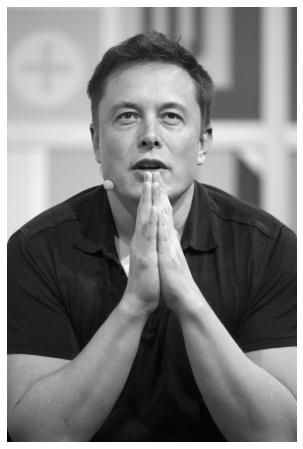

In [ ]:
img_gray_w_const = to_grayscale_w_const(im/255.0)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Image Negatives

เมื่อกลับค่าสีจากค่า "บวก" เป็นค่า "ลบ" บนภาพขาว-ดำ (greyscale) จะทำให้สีขาวและดำกลับกัน

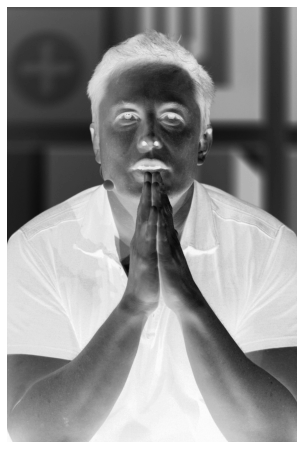

In [ ]:
img_neg = 1-(img_gray_w_const)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_neg, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Sepia Image

จงเขียนฟังก์ชันเพื่อแปลงรูปภาพจากสีให้เป็นรูปสี sepia ด้วยสูตร

R' = np.minimum(1.0, 0.393R + 0.769G + 0.189B)

G' = np.minimum(1.0, 0.349R + 0.686G + 0.168B)

B' = np.minimum(1.0, 0.272R + 0.534G + 0.131B)

จะได้ภาพตามด้านล่าง

<img src="https://www.picz.in.th/images/2018/10/11/kCVXa2.png" width="300">

In [ ]:
def sepia(im):
    ### TO DO 4 แปลงภาพสีให้เป็นภาพ Sepia ด้วยสมการข้างต้น ##########################
    
    ### CODE HERE ##############################################################
    img = np.zeros(im.shape, dtype="uint8")
    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        [R,G,B] = im[i,j]
        img[i,j,0] = np.minimum(255.0, 0.393*R + 0.769*G + 0.189*B)
        img[i,j,1] = np.minimum(255.0, 0.349*R + 0.686*G + 0.168*B)
        img[i,j,2] = np.minimum(255.0, 0.272*R + 0.534*G + 0.131*B)
    
    return img
    #############################################################################

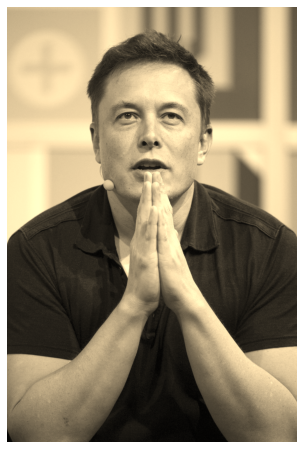

In [ ]:
img_sepia = sepia(im)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_sepia)
plt.axis('off')
plt.show()

## Convoluted

อีกหนึ่ง operations ที่สามารถนำมาใช้กับรูปภาพได้นั่นคือการ convolution ซึ่งนิยามโดย

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/cfa8253ed8f2f40508e45d0214d7e7d2e77a5c47">

โดยทั่วไปแล้วเราจะแทนที่แต่ละ pixel ด้วย weighted sum ของ pixels ข้างๆ , convolutions นั้นใช้เวลาในการทำนานพอสมควร โดยเฉพาะภาพที่มีขนาดใหญ่ 

มาเริ่มกันเลย !!!

In [ ]:
# เพื่อให้ง่ายเราจะทำ Convoluted บนภาพขาว-ดำ (1 channel)
### TO DO 5 : แก้ไขฟังก์ชัน convolute ให้สามารถใช้งานได้อย่างถูกต้อง ######################
### Hint : http://www.youtube.com/watch?v=848P9VbtfjQ&t=15m48s 

def convolute(img,kernel): # assume kernel is a 5x5 matrix
    ims = []
    result = np.ndarray(img.shape)
    for r in range(img.shape[0]-kernel.shape[0]-1):
        for c in range(img.shape[1]-kernel.shape[1]-1):
        
        ### CODE HERE ############################################################
        
          v = np.sum(img[r:r+5,c:c+5] *kernel)
          result[r+1,c+1] = min(1,max(0,v))          
            
        ##########################################################################
    return result 

In [ ]:
def blur(img):
    blur_matrix = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25]])
    img = convolute(img, blur_matrix)
    return img

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


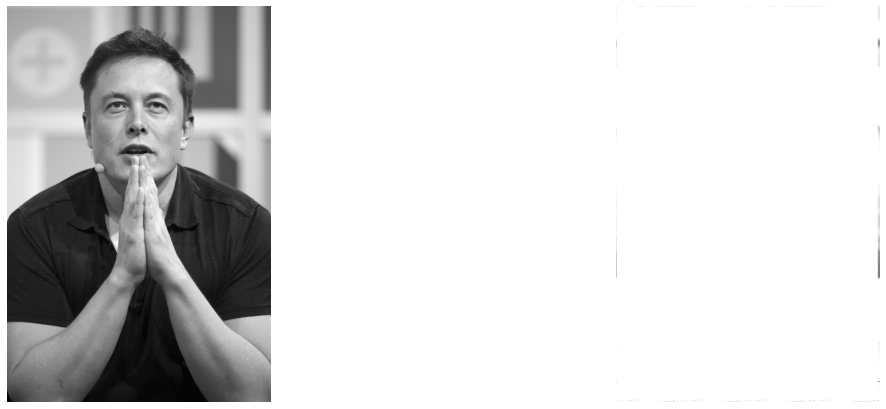

In [ ]:
blur_image = blur(img_gray_w_const)

plt.figure(num=None, figsize=(20, 16))
plt.subplot(221)
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.axis('off')
plt.imshow(blur_image, cmap=plt.get_cmap('gray'))
plt.show()

#### Test01

ลองเปลี่ยน kernel เป็น 
np.array( [ [1, 1, 1],  [1,-8, 1], [1, 1, 1] ] ) ดูสิ

In [ ]:
def test01(img):
    blur_matrix = np.array([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]])
    img = convolute(img, blur_matrix)
    return img

plt.figure(num=None, figsize=(10, 8))
plt.imshow(test01(im/255.0), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

ValueError: ignored

<Figure size 720x576 with 0 Axes>

#### Test02

ลองใช้ kernelจาก test01 แต่กลับ input ภาพให้เป็น - ดูสิ

ใส่ -img ก่อนเรียก function convolute

In [ ]:
def test02(img):
    blur_matrix = np.array([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]])
    img = convolute(-img, blur_matrix)
    return img

plt.figure(num=None, figsize=(10, 8))
plt.imshow(test02(im/255.0), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

ลองใช้ Library scipy ในการทำ convolve2d กับภาพสี

In [ ]:
from scipy.signal import convolve2d

def convolve_all_colours(im, window):
    """
    Convolves im with window, over all three colour channels
    """
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    return im_conv

### TO DO 6 : สร้าง window size ##########################################
### สร้าง windows size ขนาด 20 x 20 ที่แต่ละpixels มีค่าเท่ากับ (1/ขนาดทั้งหมด)
### จากนั้นเก็บไว้ในตัวแปร window เพื่อใช้ในการ convoluted

### CODE HERE ###########################################################






#########################################################################

plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(convolve_all_colours(im, window))

## Image Scailing

### Scale-Down ( / 2 )

เราจะทำการลดขนาดภาพลงครึ่งนึงโดยการ interpolation (เฉลี่ยค่าสีทั้ง 4 จุด ให้เหลือเพียงค่าเดียว)

<img src="https://www.img.in.th/images/2cd82e812ec82ee08303dea393e79615.gif" width="300" >

In [ ]:
### TO DO 7 : Downscale โดยการตัด row และ column ของภาพออกไปแบบ แถวเว้นแถว และ คอมลัมน์เว้นคอลัมน์

def resize_half_cut(img):
  
    ### CODE HERE #########################################################################
    resize_img = (img[::2,::2] + img[::2,1::2] + img[1::2,::2] + img[1::2,1::2])/4
    
    
    #######################################################################################
    return resize_img

In [ ]:
print("Original size ",img_gray_w_const.shape)
plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.show()

resize_img_cut = resize_half_cut(img_gray_w_const)

print("Downscale 50% : ",resize_img_cut.shape)
plt.figure(num=None, figsize=(5, 4))
plt.axis('off')
plt.imshow(resize_img_cut, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
### TO DO 8 : ทำการ interpolation โดยการใช้ filter ขนาด [[0.25, 0.25][0.25,0.25]] ##############
# Recommend : ใช้ library convolve2d จากด้านบนในการทำ convolute #################################
# Hint : เลือกเอาเฉพาะ [:img.shape[0]:2,:img.shape[1]:2] จะได้ภาพขนาดครึ่งนึงหลังจาก convolve แล้ว

def resize_half(img):
  
    ### CODE HERE #########################################################################
    
    
    
    
    #######################################################################################
    return resize_img

In [ ]:
print("Original size ",img_gray_w_const.shape)
plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.show()

resize_img = resize_half(img_gray_w_const)

print("Downscale 50% : ",resize_img.shape)
plt.figure(num=None, figsize=(5, 4))
plt.axis('off')
plt.imshow(resize_img, cmap=plt.get_cmap('gray'))
plt.show()

### Scale-Up ( x 2 )

เราจะทำการขยายภาพขึ้นเป็นสองเท่าโดยการเพิ่ม row และ column ขึ้นมาเป็น 2 เท่า

In [ ]:
### TO DO 9 : เพิ่มขนาดของภาพขึ้น 2 เท่าโดยการเพิ่มแต่ละ row และแต่ละ column ขึ้นเป็น 2 เท่า
def scale_up_normal(img):
  
  ### CODE HERE #########################################################################
  
  
  
  
  
  
  ######################################################################################
  return scale_up_img

In [ ]:
new_img = scale_up_normal(im)

plt.figure(num=None, figsize=(10, 16))
plt.subplot(211)
plt.axis('off')
plt.imshow(im[50:210,83:210,:])

plt.figure(num=None, figsize=(20, 32))
plt.subplot(212)
plt.imshow(new_img[100:420,166:420,:]/255.0)
plt.axis('off')
plt.show()

print(new_img.shape)

In [ ]:
### TO DO 10 : เพิ่มขนาดของภาพขึ้น 2 เท่าโดยการเพิ่ม row และ column ขึ้นเป็น 2 เท่าโดยการใช้ฟังก์ชัน numpy.repeat()
### Hint : https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.repeat.html

def scale_up(img):
  
  ### CODE HERE ################################################################
  
  scale_up_img = np.repeat(img, 2, axis=1)
  scale_up_img = np.repeat(scale_up_img, 2, axis=0)
  
  ##############################################################################
  return scale_up_img

In [ ]:
plt.figure(num=None, figsize=(10, 16))
plt.subplot(211)
plt.axis('off')
plt.imshow(im[50:210,83:210,:])

plt.figure(num=None, figsize=(20, 32))
plt.subplot(212)
plt.imshow(scale_up(im)[100:420,166:420,:])
plt.axis('off')
plt.show()

## Find Distance : การหาระยะห่างระหว่างธนบัตร

### Lab 1 : Demo on Ruler

ไม้บรรทัดมีความยาว 15 cm และธนบัตรอยู่ติดขอบที่สเกล 0 cm และ 15 cm พอดี 

<img src="https://www.img.in.th/images/fc145de26aa2952ab19a91826a7e5fa2.png" width=600>

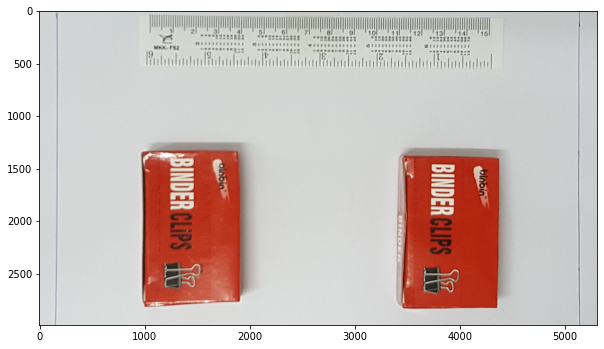

In [ ]:
### โหลดภาพเข้ามาและแสดงผลลัพธ์ของภาพนั้น

demo_img = plt.imread("d_demo.jpg")
plt.figure(num=None, figsize=(10, 8))
plt.imshow(demo_img)

plt.show()

#### Crop Ruler
ครอบภาพโดยเอาเฉพาะธนบัตรดังตัวอย่างด้านล่าง

<img src="https://www.img.in.th/images/0072ff20975e60d07c0c4d659fc3dba6.png" width="600">

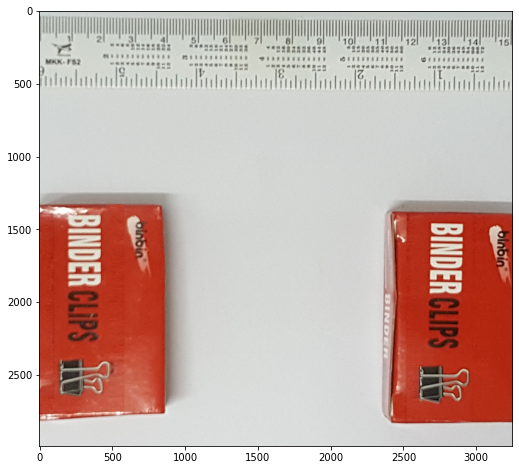

In [ ]:
### TO DO 11-1 : เนื่องจากธนบัตรอยู่บริเวณขอบของไม้บรรทัดพอดีขอบ 0 และ 15 
###              จง CROP ภาพบริเวณพื้นที่ว่างซ้ายและขวาออก ให้ธนบัตรติดขอบรูปดังภาพด้านบน

#### CODE HERE : CROP IMAGE ###################################################

demo_img_crop = demo_img[:,1050:4300]

###############################################################################

plt.figure(num=None, figsize=(10,8))
plt.imshow(demo_img_crop)
plt.show()

#### Convert to Greyscale

แปลงภาพให้เป็น Greyscale จะทำให้ง่ายต่อการคำนวนระยะห่าง


<img src="https://www.img.in.th/images/8d98d8f9e4378cb627a5e95b51299a8a.png" width="600">

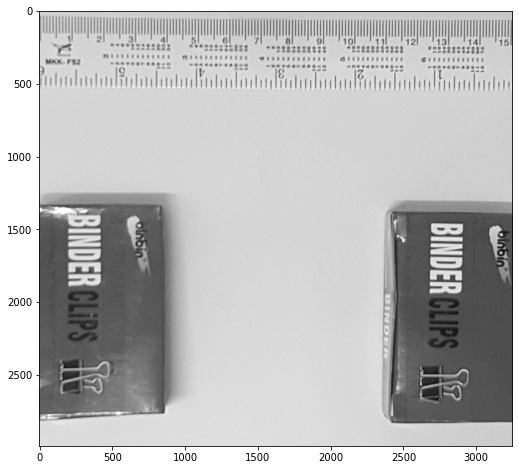

In [ ]:
### TO DO 11-2 : แปลงภาพ RGB (ภาพสี) ให้เป็นภาพ GREYSCALE ด้วยฟังก์ชันที่เคยสร้างมา

#### CODE HERE : GREYSCALE #################################################

demo_img_grey = to_grayscale_w_const(demo_img_crop)

############################################################################

plt.figure(num=None, figsize=(10,8))
# plt.axis("off")
plt.imshow(demo_img_grey, cmap=plt.get_cmap('gray'))
plt.show()

รวมค่าสีในแนวตั้งจากนั้น plot กราฟค่าสีดังจะได้หน้าตาดังภาพภาพ

<img src="https://www.img.in.th/images/daef9ed1b4001e20fb285c2b8dcc320b.png" width="600">

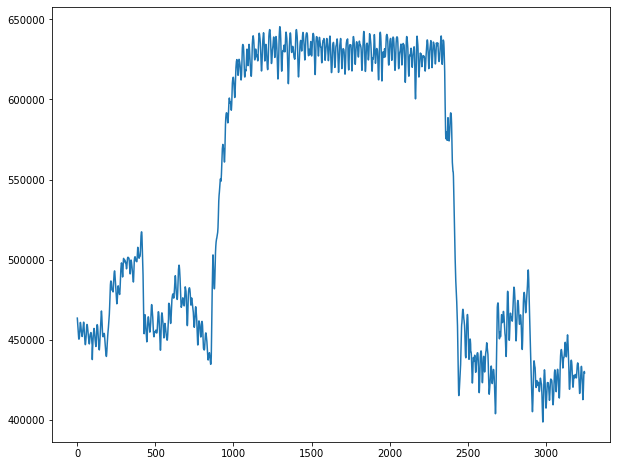

In [ ]:
### TO DO 11-3 : หาผลรวมของสีในภาพตามแนวแกนตั้ง (axis=0) เพื่อใช้ในการวิเคราะห์ระยะทาง

### CODE HERE : CALCULATE COLOR VALUE #########################################

demo_sum = np.sum(demo_img_grey, axis=0)

##############################################################################

plt.figure(num=None, figsize=(10,8))
plt.plot(np.arange(len(demo_sum)),demo_sum)

In [ ]:
# แสดงความกว้างในแนวนอนของภาพในหน่วย pixels

print('ภาพกว้าง' , demo_img_grey.shape[1])

ภาพกว้าง 3250


In [ ]:
### TO DO 11-4 : หาคำตอบว่าระยะห่างของธนบัตรเป็นเท่าใด จากกราฟที่สร้างขึ้นมา
### Hint : เรารุ้ว่าความกว้างของภาพจะยาวเท่ากับไม้บรรทัด ถ้าหาว่าวัตถุห่างกันกี่ pixel ก็แปลงกลับมาเป็น cm ได้

sc = 15/demo_img_grey.shape[1]
q = 0
a = 0
b = 0
for i in range(100,len(demo_sum)):
  if(float(demo_sum[i]) > 550000.0):
    a = i
    print(a)
    break

for i in range(len(demo_sum)-100,0,-1):
  if(float(demo_sum[i]) > 550000.0):
    b = i
    break
print(b,a)
print((b-a)*sc, "cm")

916
2409 916
6.890769230769231 cm


ภาพกว้าง      3250 pixels           

ไม้บรรทัดยาว  15 cm

ธนบัตรห่างกัน 2415(ค่า max) - 902(ค่า min) = 1513 pixels  

ความยาวบนไม้บรรทัด =  (15*1513)/3250 = 6.98 cm (ของจริง ~ 7.0 cm)

### Lab 2 : Universal distance measurement


In [ ]:
### TO DO 12 : เขียนฟังก์ชันคำนวนระยะของธนบัตรสำหรับภาพใดๆ โดยข้อมูลที่จะใช้จะเป็นอีกชุดนึงที่ถ่ายด้วยกล้องตำแหน่งเดียวกันหมด
### ผลลัพธ์ของฟังก์ชันจะ return ระยะห่างของธนบัตรในหน่วย cm

def get_distance(img_name):
  
  ### CODE HERE ################################################################
  demo22_img = plt.imread(img_name)
  demo2_img = demo22_img[:,1048:4295]
  demo_sum = np.sum(to_grayscale_w_const(demo2_img), axis=0)
  a = 0
  b = 0
  qwe = 0
  for i in demo_sum:
    qwe = max(qwe,i)
  qwe /= 1.2
  for i in range(600,len(demo_sum)):
    if(float(demo_sum[i]) > qwe):
      a = i
      break

  for i in range(len(demo_sum)-600,0,-1):
    if(float(demo_sum[i]) > qwe):
      b = i
      break
  obj_dis = (b-a)*sc
  

  ##############################################################################
  
  return obj_dis
  

In [ ]:
def feed_img():
  print("Lab_CV_1 distance = %.2f cm" % get_distance("lab_cv_1.jpg"))
  print("Lab_CV_2 distance = %.2f cm" % get_distance("lab_cv_2.jpg"))
  print("Lab_CV_3 distance = %.2f cm" % get_distance("lab_cv_3.jpg"))
  
feed_img()

Lab_CV_1 distance = 3.57 cm
Lab_CV_2 distance = 1.56 cm
Lab_CV_3 distance = 3.16 cm
